# Generator

## Evan Huang, Swinburne Lab, UC Berkeley

This program aims to assist with organization of DNA Sequencing by structuring the organization of genotyping by a few parameters: the gene being genotyped, the specific amplicon of the template DNA, the sequencing oligo, and the number of clones (templates). 

The general structure looks like this: 
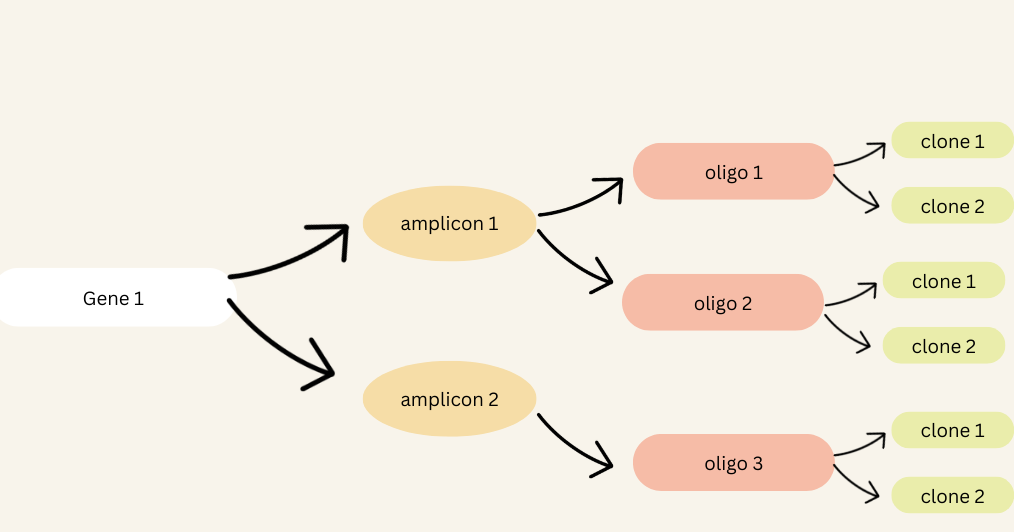

In this example, there would be 6 total samples sent to the DNA Sequencing Facility. These samples could be simply labeled 1-6, as this program will save all of the data for each of these samples in a csv file. 

This program will work for multiple genes. Each can have different sets of amplicons, and each amplicon can have a different set of sequencing oligos. All oligos will have the same number of clones. 

The program generates 2 .csv files: one containing the data for all samples, and a renaming file meant to be used in conjunuction with the Sequencing File Renamer. 

In [75]:
import Generator as gen

The generate_csv() function generates the organizational .csv file that contains all data for each sample. You can add any metadata into the 'base' variable that applies to all samples, such as the date of sequencing. Each sample is organized based on genes, amplicons, oligos, and clones. Each gene is split based on which amplicons were amplified out by PCR. For each amplicon, there is a set of sequencing oligos used for Sanger Sequencing. Finally, you may add multiple clones for each sample, which would be used if for example you had multiple DNA templates. You may find examples of how to format the inputs below. You may also read through the docstring in Generator.py for a more technical description. 

The write_naming_csv() function will use the returned matrix from generate_csv() to create a naming .csv file that will work with the Sequencing File Renamer. 

# Example Use Cases

## Example 1: Easy
The first example will be a relatively simple one. This is also the example shown in the Test Data directory; all of the sequencing files, generated csv files, and outputs can be found there. In this case, there is 1 gene with 1 amplicon being genotyped. The amplicon will be genotyped with 3 different sequencing oligos and 8 templates (clones). This means there are 24 total samples being genotyped. We begin by defining paths for our csv files:

In [81]:
sequencing_data_csv_path = 'Test Data/full_data.csv'
naming_csv_path = 'Test Data/gen_name_ref.csv'

Then, we can start defining data for our samples. Please note in this example that the $genes$ variable is a list, the $amplicons$ variable is a 2D list, and the $oligos$ variable is a 3D list. This is so that the generator will work for more complex use cases. Please also note that the amplicons are labeled as strings with both bounding primers, such as '10_35'. This would refer to the amplicon bounded by primers 10 and 35 (the primers that were used in PCR).

In [89]:
base_data = 'Evan_09-20-22_sequencing_easy'
genes = ['gene1']
amplicons = [['10_35']] 
oligos = [[[1, 2, 3]]]
clones = 8

Finally, we can run our functions to generate the csv files. You may set the default variable $append$ to True if you would like the data to be appended to the end of the csv files (if they exist) instead of overwriting. 

In [90]:
naming_data = gen.generate_csv(base_data, genes, amplicons, oligos, clones, sequencing_data_csv_path)
gen.write_naming_csv(naming_csv_path, naming_data)

## Example 2: Hard
The next example will be more complex. In this case, there will be 3 genes: gene1, gene2, and gene3. Each gene will have 1, 2, and 3 amplicons respectively. Each amplicon will have a different set of sequencing oligos. Each oligo will have 4 clones. 

In [86]:
sequencing_data_csv_path = 'Test Data/full_data.csv'
naming_csv_path = 'Test Data/gen_name_ref.csv'

base_data = 'Evan_09-20-22_sequencing_hard'
genes = ['gene1', 'gene2', 'gene3']

gene1_amplicons = ['1_2'] # 1 amplicon
gene2_amplicons = ['3_4', '5_6'] # 2 amplicons
gene3_amplicons = ['7_8', '9_10', '11_12'] # 3 amplicons
amplicons = [gene1_amplicons, gene2_amplicons, gene3_amplicons]

gene1_oligos = [[1, 2, 3]] # note this is a 2D list. the length of the outer list should match the number of amplicons
gene2_oligos = [[4, 5, 6], [7, 8, 9]] # 3 oligos for each amplicon of gene2. 
gene3_oligos = [[10, 11, 12], [13, 14, 15], [16, 17]] # can have different numbers of oligos for each amplicon
oligos = [gene1_oligos, gene2_oligos, gene3_oligos] # the final oligos variable will be a 3D list

clones = 4

naming_data = gen.generate_csv(base_data, genes, amplicons, oligos, clones, sequencing_data_csv_path, append=True)
gen.write_naming_csv(naming_csv_path, naming_data, append=True)

This program will allow each gene to have a variable number of amplicons, and each amplicon can have a variable set of oligos, each with some number of clones. This can help organize complex genotyping experiments and simplify submission to the DNA Sequencing Facility by using the naming csv in conjunction with the Sequencing File Renamer. 